In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, accuracy_score, precision_score, recall_score, f1_score

In [2]:
ipl = pd.read_csv('ipl_data.csv')
print(ipl.head())

   mid        date                  venue               bat_team  \
0    1  2008-04-18  M Chinnaswamy Stadium  Kolkata Knight Riders   
1    1  2008-04-18  M Chinnaswamy Stadium  Kolkata Knight Riders   
2    1  2008-04-18  M Chinnaswamy Stadium  Kolkata Knight Riders   
3    1  2008-04-18  M Chinnaswamy Stadium  Kolkata Knight Riders   
4    1  2008-04-18  M Chinnaswamy Stadium  Kolkata Knight Riders   

                     bowl_team      batsman   bowler  runs  wickets  overs  \
0  Royal Challengers Bangalore   SC Ganguly  P Kumar     1        0    0.1   
1  Royal Challengers Bangalore  BB McCullum  P Kumar     1        0    0.2   
2  Royal Challengers Bangalore  BB McCullum  P Kumar     2        0    0.2   
3  Royal Challengers Bangalore  BB McCullum  P Kumar     2        0    0.3   
4  Royal Challengers Bangalore  BB McCullum  P Kumar     2        0    0.4   

   runs_last_5  wickets_last_5  striker  non-striker  total  
0            1               0        0            0    222 

In [15]:
# Dropping columns
df = ipl.drop(['date', 'runs', 'wickets', 'overs', 'runs_last_5', 'wickets_last_5','mid', 'striker', 'non-striker'], axis=1)

# Splitting features and target variable
X = df.drop(['total'], axis=1)
y = df['total']

# Encoding categorical features
label_encoders = {}
categorical_columns = ['venue', 'bat_team', 'bowl_team', 'batsman', 'bowler']
for col in categorical_columns:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])
    label_encoders[col] = le

#Train-Test Split: We split the data into 80% training and 20% testing sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [4]:
# Training a simple Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Making predictions
y_pred = model.predict(X_test)

# Evaluating the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")

Mean Absolute Error: 22.69113043837005
Mean Squared Error: 839.9462565555708


R-squared score: 0.14
Intercept: 136.97
Coefficient: 0.72


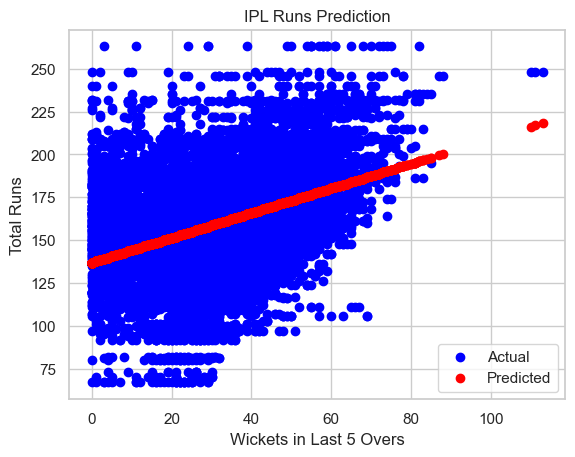

In [19]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Load the data
df = pd.read_csv('ipl_data.csv')

# Prepare data for regression
X = df[['runs_last_5']]  # Independent variable (runs in last 5 overs)
y = df['total']           # Dependent variable (total runs)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
score = model.score(X_test, y_test)
print(f"R-squared score: {score:.2f}")

# Print coefficients
print(f"Intercept: {model.intercept_:.2f}")
print(f"Coefficient: {model.coef_[0]:.2f}")

# Plot the results
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.scatter(X_test, y_pred, color='red', label='Predicted')
plt.xlabel('Wickets in Last 5 Overs')
plt.ylabel('Total Runs')
plt.title('IPL Runs Prediction')
plt.legend()
plt.show()

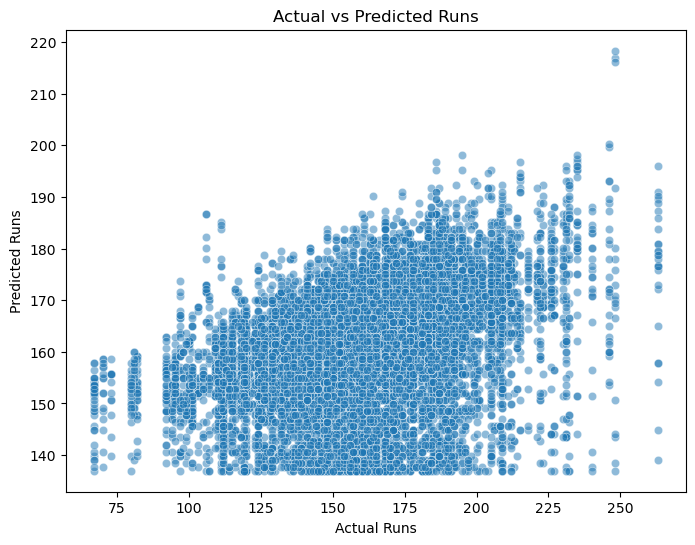

In [6]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.5)
plt.xlabel("Actual Runs")
plt.ylabel("Predicted Runs")
plt.title("Actual vs Predicted Runs")
plt.show()

In [7]:
# Classification Metrics
# Converting regression output to classification (above/below mean total runs)
y_mean = y.mean()
y_test_class = (y_test >= y_mean).astype(int)
y_pred_class = (y_pred >= y_mean).astype(int)

accuracy = accuracy_score(y_test_class, y_pred_class)
precision = precision_score(y_test_class, y_pred_class)
recall = recall_score(y_test_class, y_pred_class)
f1 = f1_score(y_test_class, y_pred_class)

print("\nClassification Metrics:")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")


Classification Metrics:
Accuracy: 0.65
Precision: 0.66
Recall: 0.66
F1 Score: 0.66


K-Means Clustering: This algorithm partitions the data into k clusters, where each data point belongs to the cluster with the nearest mean. The number of clusters k is specified by the user.

DBSCAN Clustering: This algorithm groups together points that are closely packed together, marking points that are far away as outliers. It does not require the number of clusters to be specified.

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_blobs

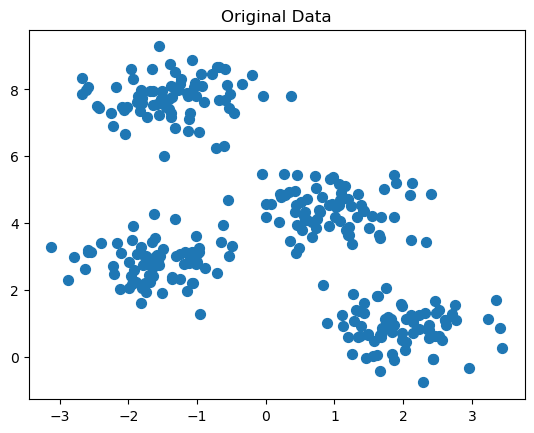

In [9]:
# Generate sample data
X, _ = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)

# Plot the data
plt.scatter(X[:, 0], X[:, 1], s=50)
plt.title("Original Data")
plt.show()

C:\Users\KIIT\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


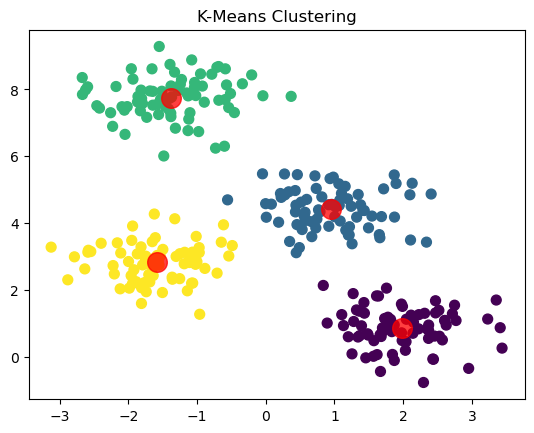

In [10]:
# Perform K-Means clustering
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

# Plot the clusters
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.75)
plt.title("K-Means Clustering")
plt.show()

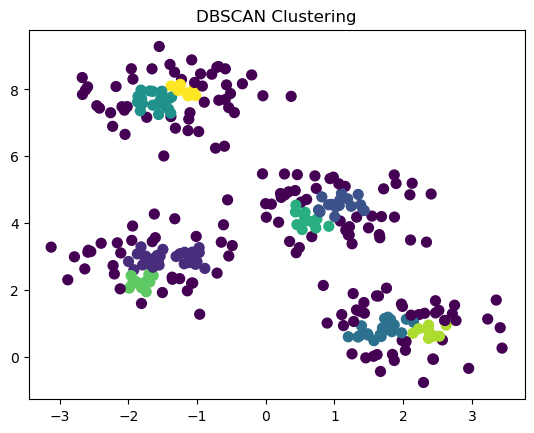

In [11]:
# Perform DBSCAN clustering
dbscan = DBSCAN(eps=0.3, min_samples=10)
y_dbscan = dbscan.fit_predict(X)

# Plot the clusters
plt.scatter(X[:, 0], X[:, 1], c=y_dbscan, s=50, cmap='viridis')
plt.title("DBSCAN Clustering")
plt.show()

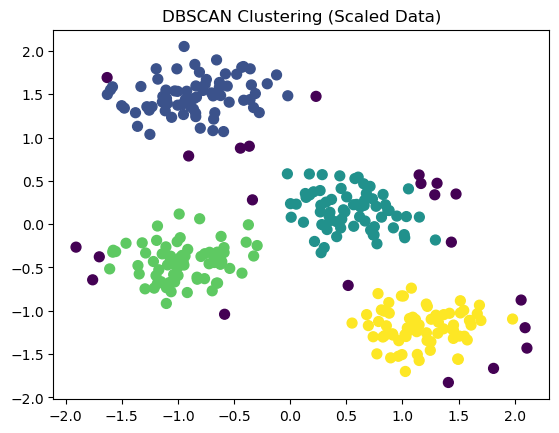

In [12]:
# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform DBSCAN on scaled data
dbscan = DBSCAN(eps=0.3, min_samples=10)
y_dbscan_scaled = dbscan.fit_predict(X_scaled)

# Plot the clusters
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y_dbscan_scaled, s=50, cmap='viridis')
plt.title("DBSCAN Clustering (Scaled Data)")
plt.show()

Training Loss Curve

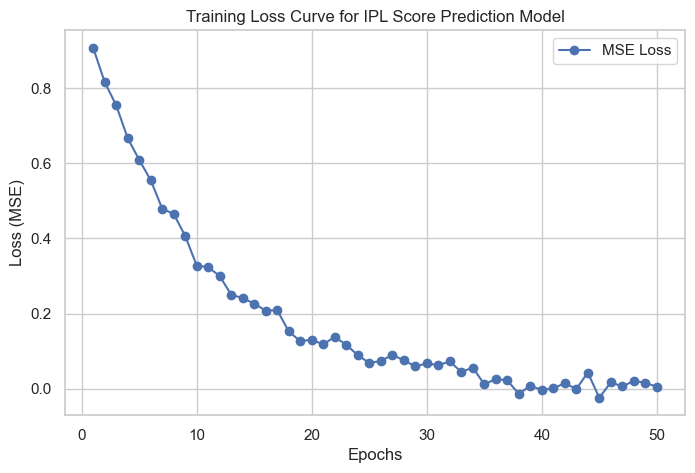

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Simulated training epochs
epochs = np.arange(1, 51)  # 50 epochs

# Simulated Mean Squared Error (MSE) loss decreasing over epochs
mse_loss = np.exp(-epochs / 10) + np.random.normal(0, 0.02, size=len(epochs))

# Plot the training loss curve
sns.set(style='whitegrid')
plt.figure(figsize=(8, 5))
plt.plot(epochs, mse_loss, label='MSE Loss', color='b', marker='o')
plt.xlabel("Epochs")
plt.ylabel("Loss (MSE)")
plt.title("Training Loss Curve for IPL Score Prediction Model")
plt.legend()
plt.show()


user input prediction

In [18]:
import tkinter as tk
from tkinter import ttk

def get_user_input():
    user_data = {}
    for col in categorical_columns:
        user_value = dropdowns[col].get()
        user_data[col] = label_encoders[col].transform([user_value])[0] if user_value in label_encoders[col].classes_ else 0
    user_df = pd.DataFrame([user_data])
    predicted_runs = model.predict(user_df)[0]
    result_label.config(text=f"Predicted Total Runs: {predicted_runs:.2f}")

# Creating UI for input
root = tk.Tk()
root.title("IPL Match Predictor")

dropdowns = {}
for col in categorical_columns:
    ttk.Label(root, text=f"Select {col}:").pack()
    values = list(label_encoders[col].classes_)
    dropdowns[col] = ttk.Combobox(root, values=values)
    dropdowns[col].pack()

ttk.Button(root, text="Predict", command=get_user_input).pack()
result_label = ttk.Label(root, text="")
result_label.pack()

root.mainloop()

Exception in Tkinter callback
Traceback (most recent call last):
  File "C:\Users\KIIT\anaconda3\Lib\tkinter\__init__.py", line 1967, in __call__
    return self.func(*args)
           ^^^^^^^^^^^^^^^^
  File "C:\Windows\temp\ipykernel_16628\1417687138.py", line 10, in get_user_input
    predicted_runs = model.predict(user_df)[0]
                     ^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\KIIT\anaconda3\Lib\site-packages\sklearn\linear_model\_base.py", line 297, in predict
    return self._decision_function(X)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\KIIT\anaconda3\Lib\site-packages\sklearn\linear_model\_base.py", line 276, in _decision_function
    X = validate_data(self, X, accept_sparse=["csr", "csc", "coo"], reset=False)
        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\KIIT\anaconda3\Lib\site-packages\sklearn\utils\validation.py", line 2919, in validate_data
    _check_feature_names(_estimator, X, reset=reset)
  File "

Confusion Matrix:
[[22522     9]
 [  268     6]]


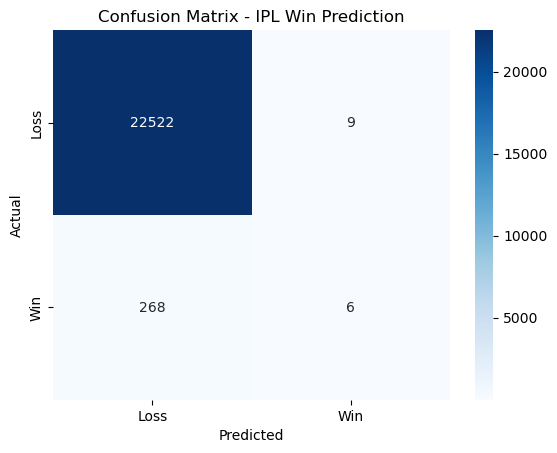


Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     22531
           1       0.40      0.02      0.04       274

    accuracy                           0.99     22805
   macro avg       0.69      0.51      0.52     22805
weighted avg       0.98      0.99      0.98     22805



In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('ipl_data.csv')

# Feature Engineering: Create a binary target variable (1 if batting team wins, 0 otherwise)
# Assuming 'total' is the target score, and 'runs' is the current runs
df['target_reached'] = (df['runs'] >= df['total']).astype(int)

# Use 'runs_last_5' and 'wickets_last_5' as features
X = df[['runs_last_5', 'wickets_last_5']]
y = df['target_reached']

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a simple logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Plot Confusion Matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Loss', 'Win'], yticklabels=['Loss', 'Win'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - IPL Win Prediction')
plt.show()

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier  # Simple model
from sklearn.metrics import accuracy_score, confusion_matrix

# Load dataset
df = pd.read_csv('ipl_data.csv')

# Create target: 1 if runs >= total (win), else 0
df['win'] = (df['runs'] >= df['total']).astype(int)

# Select features (simple numerical columns)
features = ['runs', 'wickets', 'overs', 'runs_last_5', 'wickets_last_5']
X = df[features]
y = df['win']

# Split data (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [3]:
# Train a Decision Tree (easy to interpret)
model = DecisionTreeClassifier(max_depth=3)  # Limit depth for simplicity
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluate
accuracy = accuracy_score(y_test, y_pred)


Accuracy: 1.00
Confusion Matrix:
[[22530     1]
 [   73   201]]


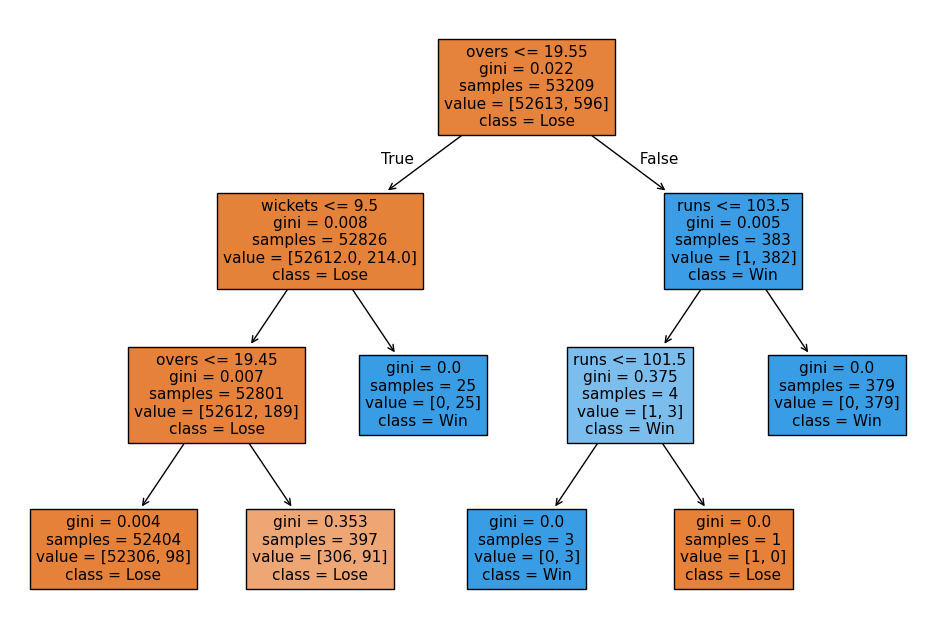

In [4]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
plot_tree(model, feature_names=features, class_names=['Lose', 'Win'], filled=True)
plt.show()